In [62]:
#Import basic EDA and Visualisation libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
housing_train = pd.read_csv('datasets/train_baseline.csv')

In [64]:
housing_train.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,68.0,13517.0,2,2,6,8,289.0,3,2,...,0,0,0,0,0,0,0,0,0,1
1,544,43.0,11492.0,2,2,7,5,132.0,3,2,...,0,0,0,0,0,0,0,0,0,1
2,153,68.0,7922.0,3,2,5,7,0.0,2,3,...,0,0,0,0,0,0,0,0,0,1
3,318,73.0,9802.0,3,2,5,5,0.0,2,2,...,0,0,0,0,0,0,0,0,0,1
4,255,82.0,14235.0,2,2,6,8,0.0,2,2,...,0,0,0,0,0,0,0,0,0,1


In [65]:
housing_train.set_index('Id', inplace = True)

In [66]:
housing_train.shape

(2026, 229)

In [67]:
housing_test = pd.read_csv('datasets/test_baseline.csv')
housing_test.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,69.0,9142,3,2,6,8,0.0,2,1,...,0,0,0,0,0,0,0,0,0,1
1,2718,69.6,9662,2,2,5,4,0.0,2,2,...,0,0,0,0,0,0,0,0,0,1
2,2414,58.0,17104,2,2,7,5,0.0,3,2,...,0,0,0,0,0,0,1,0,0,0
3,1989,60.0,8520,3,2,5,6,0.0,3,2,...,0,0,0,0,0,0,0,0,0,1
4,625,69.6,9500,2,2,6,5,247.0,2,2,...,0,0,0,0,0,0,0,0,0,1


In [68]:
housing_test.set_index('Id', inplace = True)
housing_test.shape

(879, 218)

In [69]:
test_features = housing_test.columns.to_list()
test_features

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Garage Age',
 'House Age',
 'House Remod Yrs',
 'MS SubClass_120',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',
 'MS SubClass_20',
 'MS SubClass_30',
 'MS

In [70]:
train_features = housing_train.columns.to_list()
train_features

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'Garage Age',
 'House Age',
 'House Remod Yrs',
 'MS SubClass_120',
 'MS SubClass_150',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',
 'MS Sub

In [71]:
len(train_features)

229

In [72]:
len(test_features)

218

In [73]:
common_features = set(test_features).intersection(set(train_features))
common_features

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley_Grvl',
 'Alley_Pave',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Condition 2_Feedr',
 'Condition 2_Norm',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exter

In [74]:
len(common_features)

210

In [75]:
common_features = list(common_features)

In [76]:
X = housing_train[common_features]
X.shape

(2026, 210)

In [77]:
y = housing_train['SalePrice']
y.shape

(2026,)

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [79]:
X_train.shape

(1519, 210)

In [80]:
X_val.shape

(507, 210)

In [81]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [82]:
X_train_scaled.shape

(1519, 210)

In [83]:
lasso = LassoCV(n_alphas = 300)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=300)

In [84]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.8101772804369235

In [85]:
len(lasso.coef_)

210

In [86]:
lasso_coef = pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'Coef')

In [87]:
lasso_coef.tail(20)

,Coef
MS Zoning_RM,-398.425196
MS SubClass_120,-410.168558
Exterior 1st_Wd Sdng,-502.826928
Bldg Type_TwnhsE,-587.851198
Garage Type_Basment,-598.827269
House Style_SLvl,-677.549419
Sale Type_COD,-845.833664
Exterior 2nd_Wd Shng,-892.377356
Roof Style_Mansard,-957.356097
Exterior 1st_HdBoard,-1041.934039


In [88]:
lasso_coef.head(25)

,Coef
Gr Liv Area,20939.281837
Overall Qual,12696.495431
Neighborhood_NridgHt,9774.751251
Kitchen Qual,6061.871298
Neighborhood_StoneBr,6007.745054
Exter Qual,5849.265761
1st Flr SF,5209.239407
Bldg Type_1Fam,5048.036571
Bsmt Exposure,4949.408384
Neighborhood_NoRidge,4328.878574


In [89]:
coef_cond = ((lasso_coef['Coef'] > 1500) | (lasso_coef['Coef'] < (-1500)))

In [90]:
significant_coefs = lasso_coef[coef_cond]
significant_coefs

,Coef
Gr Liv Area,20939.281837
Overall Qual,12696.495431
Neighborhood_NridgHt,9774.751251
Kitchen Qual,6061.871298
Neighborhood_StoneBr,6007.745054
Exter Qual,5849.265761
1st Flr SF,5209.239407
Bldg Type_1Fam,5048.036571
Bsmt Exposure,4949.408384
Neighborhood_NoRidge,4328.878574


In [91]:
significant_features = lasso_coef[coef_cond].index.to_list()
significant_features

['Gr Liv Area',
 'Overall Qual',
 'Neighborhood_NridgHt',
 'Kitchen Qual',
 'Neighborhood_StoneBr',
 'Exter Qual',
 '1st Flr SF',
 'Bldg Type_1Fam',
 'Bsmt Exposure',
 'Neighborhood_NoRidge',
 'Sale Type_New',
 'BsmtFin SF 1',
 'Misc Feature_Gar2',
 'Mas Vnr Area',
 'Overall Cond',
 'Garage Cars',
 'Bsmt Full Bath',
 'Exterior 1st_BrkFace',
 'Screen Porch',
 'Roof Matl_WdShngl',
 'Neighborhood_Crawfor',
 'Misc Feature_Othr',
 'Fireplaces',
 'Bsmt Qual',
 'Functional',
 'Roof Style_Hip',
 'Land Contour_HLS',
 'BsmtFin Type 1',
 'Neighborhood_Somerst',
 'Garage Area',
 'Condition 1_Norm',
 'Pool QC',
 'House Age',
 'Misc Val']

In [92]:
len(significant_features)

34

In [93]:
X_filtered = X[significant_features]

In [94]:
X_filtered.head()

,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,Kitchen Qual,Neighborhood_StoneBr,Exter Qual,1st Flr SF,Bldg Type_1Fam,Bsmt Exposure,Neighborhood_NoRidge,...,Functional,Roof Style_Hip,Land Contour_HLS,BsmtFin Type 1,Neighborhood_Somerst,Garage Area,Condition 1_Norm,Pool QC,House Age,Misc Val
Id,,,,,,,,,,,,,,,,,,,,,
109,1479.0,6,0,3,0,3,725.0,1,1,0,...,7,0,0,6,0,475.0,0,0,44,0.0
544,2122.0,7,0,3,0,3,913.0,1,1,0,...,7,0,0,6,0,559.0,1,0,24,0.0
153,1057.0,5,0,3,0,2,1057.0,1,1,0,...,7,0,0,6,0,246.0,1,0,67,0.0
318,1444.0,5,0,2,0,2,744.0,1,1,0,...,7,0,0,1,0,400.0,1,0,14,0.0
255,1445.0,6,0,2,0,2,831.0,1,1,0,...,7,0,0,1,0,484.0,1,0,120,0.0


In [95]:
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, random_state = 42)

In [96]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [97]:
X_train_scaled.shape

(1519, 34)

In [98]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [99]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 10)
lr_cv_scores.mean()

0.81957075357889

In [100]:
lr_preds = lr.predict(X_val_scaled)
lr.score(X_val_scaled, y_val)

0.8775151587606904

In [101]:
np.sqrt(mean_squared_error(lr_preds, y_val))

28189.24269515141

In [102]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 3000))
ridge.fit(X_train_scaled, y_train)
ridge.alpha_

388.02790083923753

In [103]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 10)
ridge_cv_scores.mean()

0.8249427699281453

In [104]:
ridge_preds = ridge.predict(X_val_scaled)
ridge.score(X_val_scaled, y_val)

0.8910947923278474

In [105]:
np.sqrt(mean_squared_error(ridge_preds, y_val))

26580.708984143563

In [106]:
lasso = LassoCV(n_alphas = 500)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=500)

In [107]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.8197993364814448

In [108]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.8919650703891182

In [109]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

26474.290714518967

In [110]:
residuals = lasso_preds - y_val

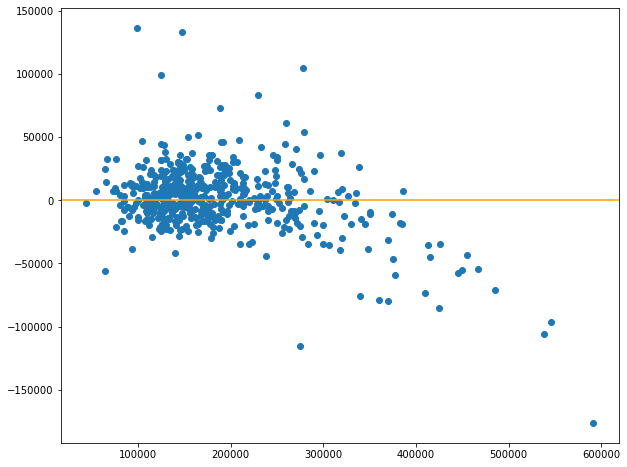

In [111]:
plt.figure(figsize = (10, 8))
plt.scatter(y_val, residuals)
plt.axhline(0, color = 'orange')


In [112]:
len(residuals)

507

In [113]:
X_test = housing_test[significant_features]
X_test.head()

,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,Kitchen Qual,Neighborhood_StoneBr,Exter Qual,1st Flr SF,Bldg Type_1Fam,Bsmt Exposure,Neighborhood_NoRidge,...,Functional,Roof Style_Hip,Land Contour_HLS,BsmtFin Type 1,Neighborhood_Somerst,Garage Area,Condition 1_Norm,Pool QC,House Age,Misc Val
Id,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,0,1,0,2,908,0,1,0,...,7,0,0,1,0,440,1,0,110,0
2718,1967,5,0,2,0,2,1967,0,1,0,...,7,0,0,1,0,580,1,0,43,0
2414,1496,7,0,3,0,3,664,1,3,0,...,7,0,0,6,0,426,1,0,14,0
1989,968,5,0,2,0,3,968,1,1,0,...,7,0,0,1,0,480,1,0,97,0
625,1394,6,0,2,0,2,1394,1,1,0,...,7,0,0,4,0,514,1,0,57,0


In [114]:
X_test.shape

(879, 34)

In [115]:
X_test_scaled = ss.fit_transform(X_test)
X_test_scaled.shape

(879, 34)

In [116]:
predictions = ridge.predict(X_test_scaled)
predictions

array([111077.28592023, 156107.16895606, 223291.56616837, 122146.06210595,
       191498.32063122,  87254.74953645, 106608.3351711 , 160208.50235206,
       183166.81681324, 166410.19506896, 160705.45992929, 121450.68299174,
       153676.30396077, 251088.26364468, 145986.58796445, 136439.12326305,
       145857.73836074, 125567.99117142, 190288.89216346, 187080.50734553,
       151819.64115009, 126959.69537266, 190071.34377307, 168891.64378814,
       185210.36224557, 131423.5236544 , 120236.96039047, 129950.54814647,
       171630.68541926,  22984.43238058, 110259.12980553, 109940.52602947,
       228760.49743629, 164615.37603301, 224128.1581458 , 174921.89347466,
       114541.33772672,  91409.11887174, 147465.31955458, 197764.29438381,
       182398.90442144, 201459.13710214, 158983.25560261, 156969.28641968,
       226295.90233717,  91706.87685572, 222942.16325296, 118465.55707743,
       127225.80774194, 119700.25587074, 107394.02892436, 200492.44504202,
       239701.61355672, 1

In [117]:
X_test['SalePrice'] = predictions
X_test.head()

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,Kitchen Qual,Neighborhood_StoneBr,Exter Qual,1st Flr SF,Bldg Type_1Fam,Bsmt Exposure,Neighborhood_NoRidge,...,Roof Style_Hip,Land Contour_HLS,BsmtFin Type 1,Neighborhood_Somerst,Garage Area,Condition 1_Norm,Pool QC,House Age,Misc Val,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,0,1,0,2,908,0,1,0,...,0,0,1,0,440,1,0,110,0,111077.285920
2718,1967,5,0,2,0,2,1967,0,1,0,...,0,0,1,0,580,1,0,43,0,156107.168956
2414,1496,7,0,3,0,3,664,1,3,0,...,0,0,6,0,426,1,0,14,0,223291.566168
1989,968,5,0,2,0,3,968,1,1,0,...,0,0,1,0,480,1,0,97,0,122146.062106
625,1394,6,0,2,0,2,1394,1,1,0,...,0,0,4,0,514,1,0,57,0,191498.320631


In [118]:
submission = X_test[['SalePrice']]
submission.head()

,SalePrice
Id,
2658,111077.285920
2718,156107.168956
2414,223291.566168
1989,122146.062106
625,191498.320631


In [119]:
submission.sort_index(inplace = True)
submission.head()

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SalePrice
Id,
2,118956.955409
4,281596.809598
6,179656.549958
7,244238.287954
17,210830.606507


In [120]:
submission.shape

(879, 1)

In [121]:
submission.to_csv('datasets/Projected Prices (Baseline).csv')